In [14]:
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
train_raw = pd.read_csv('./train.csv')
test_raw = pd.read_csv('./test.csv')

In [38]:
train = train_raw.copy()
test = test_raw.copy()

# 데이터 탐색

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Osen, Mr. Olaf Elon",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [17]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# 데이터 전처리

In [39]:
Id_test = test[['PassengerId']]

In [40]:
train['Ticket_type'] = train['Ticket'].apply(lambda x: x[0:3])
train['Ticket_type'] = train['Ticket_type'].astype('category')
train['Ticket_type'] = train['Ticket_type'].cat.codes

test['Ticket_type'] = test['Ticket'].apply(lambda x: x[0:3])
test['Ticket_type'] = test['Ticket_type'].astype('category')
test['Ticket_type'] = test['Ticket_type'].cat.codes

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,124
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,137
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,148
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,97
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,72
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,18
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,83
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,81
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,38


In [41]:
full_data = [train, test]


# Gives the length of the name
train['Words_Count'] = train['Name'].apply(lambda x: len(x.split()))
test['Words_Count'] = test['Name'].apply(lambda x: len(x.split()))

# Feature that tells whether a passenger had a cabin on the Titanic
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

# Create new feature FamilySize as a combination of SibSp and Parch
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
# Create new feature IsAlone from FamilySize
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
# Remove all NULLS in the Embarked column
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    
# Remove all NULLS in the Fare column and create a new feature CategoricalFare
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)

# Create a New feature CategoricalAge
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
train['CategoricalAge'] = pd.cut(train['Age'], 5)

# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Create a new feature Title, containing the titles of passenger names
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
    
# Group all non-common titles into one single grouping "Rare"
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
# Feature selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)
test  = test.drop(drop_elements, axis = 1)

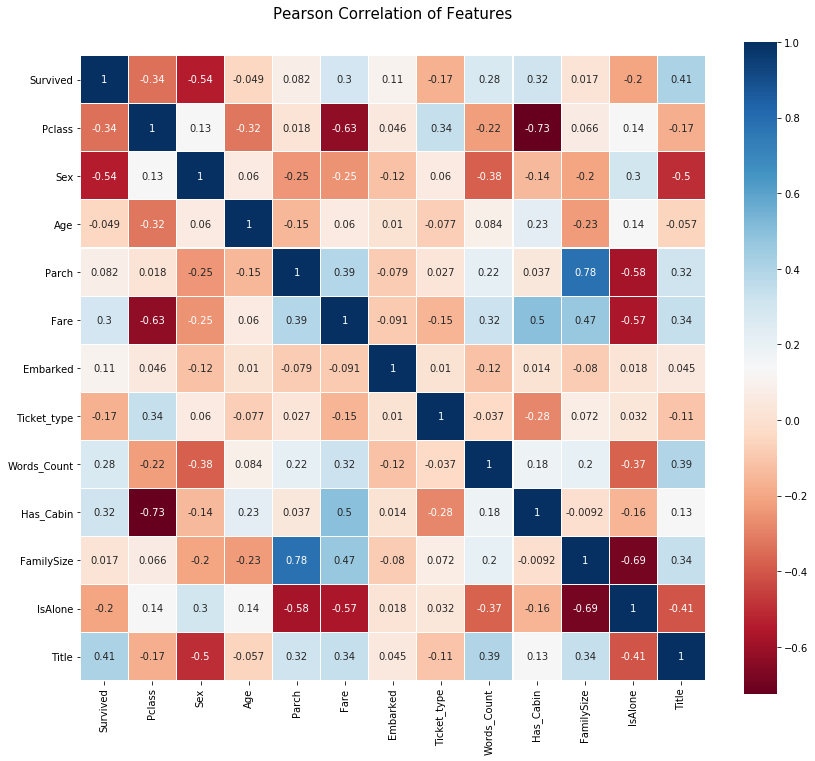

In [10]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [11]:
train

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Ticket_type,Words_Count,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,124,4,0,2,0,1
1,1,1,0,2,0,3,1,137,7,1,2,0,3
2,1,3,0,1,0,1,0,148,3,0,1,1,2
3,1,1,0,2,0,3,0,3,7,1,2,0,3
4,0,3,1,2,0,1,0,97,4,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,1,0,23,3,0,1,1,5
887,1,1,0,1,0,2,0,2,4,1,1,1,2
888,0,3,0,0,2,2,0,150,5,0,4,0,2
889,1,1,1,1,0,2,1,1,4,1,1,1,1


# 모델링

In [14]:
y_train = train['Survived']
X_train = train.drop(['Survived'], axis=1)

In [15]:
X_train.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,Ticket_type,Words_Count,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,1,0,0,0,124,4,0,2,0,1
1,1,0,2,0,3,1,137,7,1,2,0,3
2,3,0,1,0,1,0,148,3,0,1,1,2
3,1,0,2,0,3,0,3,7,1,2,0,3
4,3,1,2,0,1,0,97,4,0,1,1,1


In [16]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
answer = pd.read_csv('./answer.csv')
ans = answer.Survived

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression().fit(X_train, y_train)

score = cross_val_score(logistic, X_train, y_train)
print(np.mean(score) * 100, '%')

pred = logistic.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

80.24543343167409 %
77.27272727272727 %


### SVC

In [21]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)

score = cross_val_score(svc, X_train, y_train)
print(np.mean(score) * 100, '%')

pred = svc.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

66.55639947272614 %
60.76555023923444 %


In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_param = {'kernel': ['rbf'], 
             'gamma': [ 0.001, 0.01, 0.1, 1],
             'C': [1, 10, 50, 100,200,300, 1000]}

svc = SVC()
svc_grid = GridSearchCV(svc, param_grid = svc_param, cv=5, scoring="accuracy")
svc_grid.fit(X_train, y_train)

score = cross_val_score(svc_grid, X_train, y_train)
print(np.mean(score) * 100, '%')

pred = svc_grid.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

80.4732910677296 %
73.92344497607655 %


### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)

score = cross_val_score(dt, X_train, y_train)
print(np.mean(score) * 100, '%')

pred = dt.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

77.44334944447931 %
73.44497607655502 %


### MLP

In [24]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier().fit(X_train, y_train)

score = cross_val_score(mlp, X_train, y_train)
print(np.mean(score) * 100, '%')

pred = mlp.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

81.70422446801831 %
77.75119617224881 %


### Bagging

In [25]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier().fit(X_train, y_train)

score = cross_val_score(bc, X_train, y_train)
print(np.mean(score) * 100, '%')

pred = bc.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

80.24857196660598 %
77.99043062200957 %


### RandomForest

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)

score = cross_val_score(rf, X_train, y_train)
print(np.mean(score) * 100, '%')

pred = rf.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

80.5856506182914 %
75.35885167464114 %


### Extra trees

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier().fit(X_train, y_train)

score = cross_val_score(et, X_train, y_train)
print(np.mean(score) * 100, '%')

pred = et.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

79.57567007720796 %
74.88038277511961 %


### Adaboost

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier().fit(X_train, y_train)

score = cross_val_score(ab, X_train, y_train)
print(np.mean(score) * 100, '%')

pred = ab.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

82.7154604230745 %
75.35885167464114 %


### Gradient Boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier().fit(X_train, y_train)

score = cross_val_score(gb, X_train, y_train)
print(np.mean(score) * 100, '%')

pred = gb.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

83.39024543343167 %
76.55502392344498 %


### XGBoost

In [30]:
import xgboost as xgb

gbm = xgb.XGBClassifier().fit(X_train, y_train)

score = cross_val_score(gbm, X_train, y_train)
print(np.mean(score) * 100, '%')

pred = gbm.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

81.48327160881301 %
78.22966507177034 %


### Voting

In [31]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

kfold = StratifiedKFold(n_splits=10)

In [32]:
lr = LogisticRegression()

lr_param = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

lr_grid = GridSearchCV(lr, param_grid = lr_param, cv=5, scoring="accuracy")

lr_grid.fit(X_train,y_train)

lr_best = lr_grid.best_estimator_
print(lr_grid.best_score_)

pred = lr_best.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

0.8024543343167408
77.27272727272727 %


In [33]:
svc = SVC(probability=True)
svc_param = {'kernel': ['rbf'], 
             'gamma': [ 0.001, 0.01, 0.1, 1],
             'C': [1, 10, 50, 100,200,300, 1000]}

svc_grid = GridSearchCV(svc,param_grid = svc_param, cv=5, scoring="accuracy")

svc_grid.fit(X_train,y_train)

svc_best = svc_grid.best_estimator_
print(svc_grid.best_score_)

pred = svc_best.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

0.8170861841692298
73.92344497607655 %


In [35]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy")

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

print(gsRFC.best_score_)

pred = RFC_best.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

0.8406616729088638
76.79425837320574 %


In [37]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy")

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

0.8294382022471909

In [38]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy")

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

0.8170536828963796

In [46]:
# XGBoost
xgbm = xgb.XGBClassifier()

## Search grid for optimal parameters
xgbm_param_grid={'min_child_weight': [1, 5, 10],
                'gamma': [0.5, 1, 1.5, 2, 5],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0],
                'max_depth': [3, 4, 5]
                }


gsxgb = GridSearchCV(xgbm, param_grid = xgbm_param_grid, cv=kfold, scoring="accuracy")

gsxgb.fit(X_train,y_train)

xgbm_best = gsxgb.best_estimator_

# Best score
print(gsxgb.best_score_)

pred = xgbm_best.predict(test)

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

0.8451061173533082
77.03349282296651 %


In [558]:
voting = VotingClassifier(estimators=[('lr', lr_best),('svc', svc_best),('gb', GBC_best),
                                      ('rfc', RFC_best),('et', ExtC_best)], voting='soft')

voting = voting.fit(X_train,y_train)

In [559]:
pred = voting.predict(test)

In [560]:
submission = Id_test.copy()
submission['Survived'] = pred
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [561]:
# submission.to_csv('submission_80143.csv', index=False)

answer = pd.read_csv('./answer.csv')
ans = answer.Survived

c = np.where(pred-ans == 0, 1, 0)
print(c.sum() / len(ans) * 100, '%')

80.14354066985646 %


In [564]:
score = cross_val_score(voting, X_train, y_train)
print(np.mean(score) * 100, '%')

82.04318624066286 %
